In [ ]:
import numpy as np
import torch as tc
import matplotlib.pyplot as plt

# Let f(x, y) = x**2 + y**2
# Let's minimize the function analytically
# Gf(x) = [df(x, y) / dx, df(x, y) / dy] = [2*x, 2*y]
# 2*x = 0
# 2*y = 0
# The minimum is clearly defined (x, y) = (0, 0)
# Now verify this by the gradient descent

# Implement the gradient descent here
def gradient_descent(f, initial_guess, num_iters, learning_rate, echo=False):
  """
  f - function (callable) : function taking N variables as input
  num_iters - int : number of iterations
  initial_guess - Tensor : vector of N variables
  learning_rate - float: the learning rate for the gradient descent update
  echo - bool: whether to print the results during each iteration
  Note: Implement the gradient calculation on your own
  """
  result =  tc.as_tensor(initial_guess)

  step = 0.001 # Some inner step inside the function to calculate the gradient
  for i in range(num_iters):
    gradient = tc.zeros_like(result)
    for j in range(len(result)):
      positive_copy = tc.clone(result)
      negative_copy = tc.clone(result)
      positive_copy[j] += step
      negative_copy[j] -= step
      gradient[j] = (f(*positive_copy) - f(*negative_copy)) / (2*step)

    result = result - learning_rate * gradient
    if echo: 
      print(f'Current result: {result}, Value of the function at the current result: {f(*result)}')
  return result

f = lambda x, y: x**2 + y**2
initial_guess = tc.randn(2).type(tc.float32) # Let's start with some two random numbers
num_iters = 50
learning_rate = 0.1
echo = True

result = gradient_descent(f, initial_guess, num_iters, learning_rate, echo)
print(f"Initial arguments: {initial_guess}, Value of the function for the initial arguments: {f(*initial_guess)}")
print(f"Result: {result}, Value of the function at the result: {f(*result)}")

print()

%timeit gradient_descent(f, initial_guess, num_iters, learning_rate, echo)

Current result: tensor([-0.6003, -0.7778]), Value of the function at the current result: 0.9653333425521851
Current result: tensor([-0.4803, -0.6222]), Value of the function at the current result: 0.6178202629089355
Current result: tensor([-0.3842, -0.4978]), Value of the function at the current result: 0.39540478587150574
Current result: tensor([-0.3074, -0.3982]), Value of the function at the current result: 0.2530612647533417
Current result: tensor([-0.2459, -0.3186]), Value of the function at the current result: 0.1619597226381302
Current result: tensor([-0.1967, -0.2549]), Value of the function at the current result: 0.10365470498800278
Current result: tensor([-0.1574, -0.2039]), Value of the function at the current result: 0.06633936613798141
Current result: tensor([-0.1259, -0.1631]), Value of the function at the current result: 0.04245700314640999
Current result: tensor([-0.1007, -0.1305]), Value of the function at the current result: 0.02717248909175396
Current result: tensor(

In [ ]:
initial_guess = tc.randn(2).type(tc.float32) # Let's start with some two random numbers
num_iters = 50
learning_rate_low = 0.01
learning_rate_medium = 0.1
learning_rate_high =  10
echo = True

print()
result_lr_low = gradient_descent(f, initial_guess, num_iters, learning_rate_low, echo)
print()
print(f"Result: {result}, Value of the function at the result: {f(*result_lr_low)}")

print()
result_lr_medium = gradient_descent(f, initial_guess, num_iters, learning_rate_medium, echo)
print()
print(f"Result: {result}, Value of the function at the result: {f(*result_lr_medium)}")

print()
result_lr_high = gradient_descent(f, initial_guess, num_iters, learning_rate_high, echo)
print()
print(f"Result: {result}, Value of the function at the result: {f(*result_lr_high)}")


Current result: tensor([0.2654, 0.4666]), Value of the function at the current result: 0.28811508417129517
Current result: tensor([0.2601, 0.4572]), Value of the function at the current result: 0.2767058312892914
Current result: tensor([0.2549, 0.4481]), Value of the function at the current result: 0.2657485008239746
Current result: tensor([0.2498, 0.4391]), Value of the function at the current result: 0.2552250623703003
Current result: tensor([0.2448, 0.4303]), Value of the function at the current result: 0.2451181858778
Current result: tensor([0.2399, 0.4217]), Value of the function at the current result: 0.2354116141796112
Current result: tensor([0.2351, 0.4133]), Value of the function at the current result: 0.22608940303325653
Current result: tensor([0.2304, 0.4050]), Value of the function at the current result: 0.21713636815547943
Current result: tensor([0.2258, 0.3969]), Value of the function at the current result: 0.20853778719902039
Current result: tensor([0.2213, 0.3890]), Va

In [ ]:
# Implement the gradient descent here
def gradient_descent_autograd(f, initial_guess, num_iters, learning_rate, echo=False):
  """
  f - function (callable) :of N variables
  num_iters - int : number of iterations
  initial_guess - Tensor : vector of N variables
  learning_rate - float: the learning rate for gradient descent update
  echo - bool: whether to print the results during each iteration
  Note: Implement the gradient calculation using PyTorch Autograd
  """
  result =  tc.tensor(initial_guess, requires_grad=True)
  for i in range(num_iters):
    gradient = tc.autograd.grad(f(*result), result)
    result = result - learning_rate * gradient[0]

    if echo: # TODO - print the current result and the function value for this result
      print(f'Current result: {result}, Value of the function at the current result: {f(*result)}')

    #gradient[0].grad.zero_()
  return result

f = lambda x, y: x**2 + y**2
initial_guess = tc.randn(2).type(tc.float32)# Let's start with some two random numbers
num_iters = 50
learning_rate = 0.1
echo = True

result = gradient_descent(f, initial_guess, num_iters, learning_rate, echo)
result_autograd = gradient_descent_autograd(f, initial_guess, num_iters, learning_rate, echo)
print(f"Initial arguments: {initial_guess}, Value of the function for the initial arguments: {f(*initial_guess)}")
print(f"Result: {result}, Value of the function at the result: {f(*result)}")
print(f"Result Autograd: {result_autograd}, Value of the function at the result: {f(*result_autograd)}")

print()

%timeit gradient_descent_autograd(f, initial_guess, num_iters, learning_rate, echo)

Current result: tensor([-0.7389,  0.0158]), Value of the function at the current result: 0.5462256669998169
Current result: tensor([-0.5911,  0.0126]), Value of the function at the current result: 0.34958747029304504
Current result: tensor([-0.4729,  0.0101]), Value of the function at the current result: 0.223737895488739
Current result: tensor([-0.3783,  0.0081]), Value of the function at the current result: 0.1431931108236313
Current result: tensor([-0.3027,  0.0065]), Value of the function at the current result: 0.09164408594369888
Current result: tensor([-0.2421,  0.0052]), Value of the function at the current result: 0.05865250900387764
Current result: tensor([-0.1937,  0.0041]), Value of the function at the current result: 0.03753756359219551
Current result: tensor([-0.1550,  0.0033]), Value of the function at the current result: 0.02402397245168686
Current result: tensor([-0.1240,  0.0026]), Value of the function at the current result: 0.01537533849477768
Current result: tensor(

<ipython-input-4-bea2de86d59e>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result =  tc.tensor(initial_guess, requires_grad=True)


Current result: tensor([-6.2859e-05,  1.3434e-06], grad_fn=<SubBackward0>), Value of the function at the current result: 3.953022797986705e-09
Current result: tensor([-5.0287e-05,  1.0747e-06], grad_fn=<SubBackward0>), Value of the function at the current result: 2.5299347061746857e-09
Current result: tensor([-4.0230e-05,  8.5977e-07], grad_fn=<SubBackward0>), Value of the function at the current result: 1.6191580298752228e-09
Current result: tensor([-3.2184e-05,  6.8782e-07], grad_fn=<SubBackward0>), Value of the function at the current result: 1.0362612989922582e-09
Current result: tensor([-2.5747e-05,  5.5025e-07], grad_fn=<SubBackward0>), Value of the function at the current result: 6.632072113710308e-10
Current result: tensor([-2.0598e-05,  4.4020e-07], grad_fn=<SubBackward0>), Value of the function at the current result: 4.2445263970236624e-10
Current result: tensor([-1.6478e-05,  3.5216e-07], grad_fn=<SubBackward0>), Value of the function at the current result: 2.716496749766151

In [ ]:
class ClassificationNetwork(tc.nn.Module):
    #TODO - implement the neural network architecture
    def __init__(self):
        super(ClassificationNetwork, self).__init__()
        self.conv_relu_stack = tc.nn.Sequential(
          tc.nn.Conv2d(1,32,3,1,1),
          tc.nn.BatchNorm2d(32),
          tc.nn.ReLU(),
          tc.nn.Conv2d(32,64,3,2,2),
          tc.nn.BatchNorm2d(64),
          tc.nn.ReLU(),
          tc.nn.Conv2d(64,64,3,1,1),
          tc.nn.BatchNorm2d(64),
          tc.nn.ReLU(),
          tc.nn.Conv2d(64,64,3,2,2),
          tc.nn.BatchNorm2d(64),
          tc.nn.ReLU(),
          tc.nn.Conv2d(64,64,3,2,2),
          tc.nn.BatchNorm2d(64),
          tc.nn.ReLU(),
          tc.nn.Conv2d(64,64,3,2,1),
          tc.nn.BatchNorm2d(64),
          tc.nn.ReLU(),
          tc.nn.AdaptiveAvgPool2d((1,1)),
        )
        self.linear_relu_stack = tc.nn.Sequential(
          tc.nn.Linear(64, 64),
          tc.nn.ReLU(),
          tc.nn.Linear(64, 64),
          tc.nn.ReLU(),
          tc.nn.Linear(64, 4),
        )

    def forward(self, x):
        logits = self.conv_relu_stack(x)
        batch_size = x.size()[0]
        logits = logits.view(batch_size,-1)
        logits = self.linear_relu_stack(logits)
        return logits

from torchsummary import summary
device = "cuda:0"

classification_network = ClassificationNetwork()

batch_size = 4
random_input = tc.randn((batch_size, 1, 224, 224))
random_output = classification_network(random_input)

print(f"Size of the random input: {random_input.size()}")
print(f"Size of the random output: {random_output.size()}")
print("Random output: ")
print(random_output)

print("Network summary: ")
summary(classification_network.to(device), (1, 224, 224))

Size of the random input: torch.Size([4, 1, 224, 224])
Size of the random output: torch.Size([4, 4])
Random output: 
tensor([[ 0.0087, -0.0396, -0.0208, -0.0506],
        [ 0.0039, -0.0450, -0.0209, -0.0527],
        [ 0.0061, -0.0386, -0.0214, -0.0586],
        [ 0.0089, -0.0431, -0.0224, -0.0545]], grad_fn=<AddmmBackward0>)
Network summary: 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             320
       BatchNorm2d-2         [-1, 32, 224, 224]              64
              ReLU-3         [-1, 32, 224, 224]               0
            Conv2d-4         [-1, 64, 113, 113]          18,496
       BatchNorm2d-5         [-1, 64, 113, 113]             128
              ReLU-6         [-1, 64, 113, 113]               0
            Conv2d-7         [-1, 64, 113, 113]          36,928
       BatchNorm2d-8         [-1, 64, 113, 113]             128
             

In [ ]:
import os
import pandas as pd
!pip install SimpleITK
import SimpleITK as sitk
import torchvision as tv

from google.colab import drive
drive.mount('/content/gdrive')

input_file = "/content/gdrive/MyDrive/Brain_MRI.zip" # Path to the "Brain_MRI.zip"
output_folder = "/content/gdrive/MyDrive/Brain_MRI" # Path to the folder where you would like to unzip the input ".zip" file

print(f"Input file path: {input_file}")
print(f"Output folder path: {output_folder}")

#!unzip {input_file} -d {output_folder}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 16.9 MB/s eta 0:00:00
Mounted at /content/gdrive
Input file path: /content/gdrive/MyDrive/Brain_MRI.zip
Output folder path: /content/gdrive/MyDrive/Brain_MRI


In [ ]:
dataset_path = output_folder
training_csv_path = os.path.join(dataset_path, "training.csv")
testing_csv_path = os.path.join(dataset_path, "testing.csv")

# Repeat the process from the __init__ function to create pandas dataframe
# containing three components: (image_path, image_class_number, image_class_name)

classes = os.listdir(os.path.join(dataset_path,  "Training"))
print(f"Available classes: {classes}")
classes_dict = {classes[i]: i for i in range(len(classes))}
print(f"Classes dict: {classes_dict}")

training_cases = []
testing_cases = []
for current_class in classes:
    current_training_path = os.path.join(dataset_path, "Training")
    current_training_path = os.path.join(current_training_path, current_class)

    for current_case in os.listdir(current_training_path):
      current_path = os.path.join(current_training_path, current_case)
      training_cases.append((current_path, classes_dict.get(current_class), current_class))

    current_testing_path = os.path.join(dataset_path, "Testing")
    current_testing_path = os.path.join(current_testing_path, current_class)

    for current_case in os.listdir(current_testing_path):
      current_path = os.path.join(current_testing_path, current_case)
      testing_cases.append([current_path, classes_dict.get(current_class), current_class])

training_dataframe = pd.DataFrame(data=training_cases, columns=['image_path', 'image_class_number', 'image_class_name'])
testing_dataframe = pd.DataFrame(data=testing_cases, columns=['image_path', 'image_class_number', 'image_class_name'])

training_dataframe.to_csv(training_csv_path, columns=['image_path', 'image_class_number'])
testing_dataframe.to_csv(testing_csv_path, columns=['image_path', 'image_class_number'])

Available classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Classes dict: {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


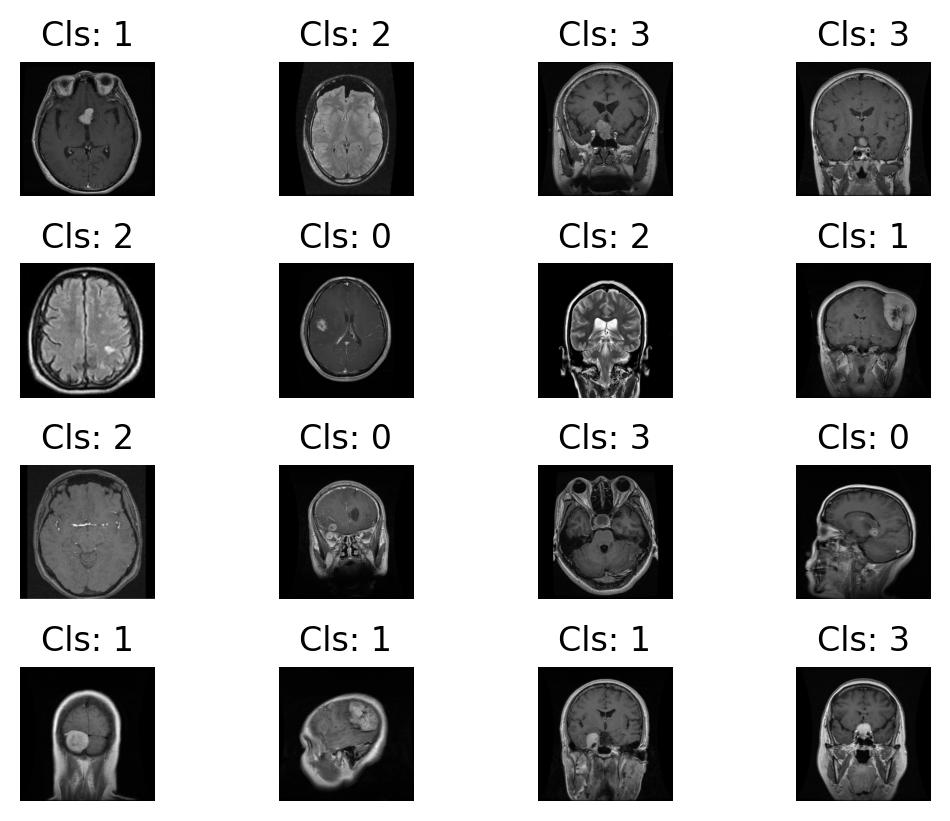

In [ ]:
class BrainDataset(tc.utils.data.Dataset):
    def __init__(self, dataset_path, csv_path, transforms=None, z_norm=False):
        self.dataset_path = dataset_path
        self.csv_path = csv_path
        self.dataframe = pd.read_csv(csv_path)

    def __len__(self):
        return len(self.dataframe)
        
    def __getitem__(self, idx):
        current_image = tv.io.read_image(self.dataframe.iloc[idx]['image_path'])
        current_class = self.dataframe.iloc[idx]['image_class_number']

        # All images should have the same resolution
        # Resample the images to the same resolution (224x224), then convert the images to grayscale (if not already) and normalize to [0-1] values
        current_image = tv.transforms.Resize(size=(224,224), interpolation=tv.transforms.InterpolationMode.BILINEAR)(current_image)
        current_image = tv.transforms.Grayscale()(current_image)
        current_image = current_image.type(tc.float)
        current_image = tv.transforms.Normalize(mean=(0.5), std=(0.5))(current_image)
        
        return current_image, current_class

batch_size = 16
shuffle = True
training_dataset = BrainDataset(os.path.join(dataset_path, "Training"), training_csv_path)
training_dataloader = tc.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=shuffle)

plt.figure(dpi=200)
i = 1

for images, classes in training_dataloader:
    plt.subplot(4, 4, i)
    plt.imshow(images[0, 0, :, :], cmap='gray')
    plt.subplots_adjust(hspace=0.5)
    plt.axis('off')
    plt.title('Cls: ' + str(classes[0].item()))
    i += 1

    if i > 4*4:
      break

In [ ]:
def training(model, training_dataloader, testing_dataloader, training_params):
  num_epochs = training_params['num_epochs']
  learning_rate = training_params['learning_rate']

  objective_function = tc.nn.CrossEntropyLoss()
  parameters = model.parameters()
  optimizer = tc.optim.Adam(parameters, learning_rate)
  device = "cuda:0" # You want to use GPU (remember to set the correct run enviroment in the Google Colab settings)

  training_losses = []
  testing_losses = [] # NOTE: in practical applications you should use validation set
  model = model.to(device) # Transfer the network to GPU
  
  print(f"Training dataset size: {len(training_dataloader.dataset)}")
  print(f"Testing dataset size: {len(testing_dataloader.dataset)}")
  for epoch in range(num_epochs):
    print(f"Current epoch: {epoch}")
    training_epoch_loss = 0.0
    model.train()
    for images, classes in training_dataloader:
        images, classes = images.to(device), classes.to(device) # TODO: Transfer the images and classes to GPU
        output = model(images) # TODO: Forward the images through the model
        loss = objective_function(output, classes) # TODO: Calculate the objective function 
        loss.backward() # TODO: Backpropagate the gradient
        optimizer.step() # TODO: Update the optimizer
        optimizer.zero_grad() # TODO: Reset the optimizer gradient
        training_epoch_loss += loss # TODO: Update the epoch loss

    training_epoch_loss = training_epoch_loss / len(training_dataloader.dataset)
    training_losses.append(training_epoch_loss)
    print(f"Current epoch training loss: {training_epoch_loss}")

    testing_epoch_loss = 0.0
    model.eval()
    for images, classes in testing_dataloader:
      with tc.set_grad_enabled(False):
        images, classes = images.to(device), classes.to(device) # TODO: Transfer the images and classes to GPU
        output = model(images) # TODO: Forward the images through the model
        loss = objective_function(output, classes) # TODO: Calculate the objective function 
        testing_epoch_loss += loss # TODO: Update the epoch loss

    testing_epoch_loss = testing_epoch_loss / len(testing_dataloader.dataset)
    testing_losses.append(testing_epoch_loss)
    print(f"Current epoch testing loss: {testing_epoch_loss}")

  # Return the trained model and the history of training and testing losses
  return model, training_losses, testing_losses

In [ ]:
learning_rate = 0.003
batch_size = 32
num_epochs = 100
shuffle = True
model = ClassificationNetwork()

training_params = {
    'learning_rate': learning_rate,
    'num_epochs': num_epochs,
}

training_dataset = BrainDataset(os.path.join(dataset_path, "Training"), training_csv_path)
training_dataloader = tc.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=shuffle)

testing_dataset = BrainDataset(os.path.join(dataset_path, "Testing"), testing_csv_path)
testing_dataloader = tc.utils.data.DataLoader(testing_dataset, batch_size=batch_size, shuffle=False)

model, training_losses, testing_losses = training(model, training_dataloader, testing_dataloader, training_params)

Training dataset size: 2854
Testing dataset size: 394
Current epoch: 0


/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Current epoch training loss: 0.032402586191892624
Current epoch testing loss: 0.05523383989930153
Current epoch: 1
Current epoch training loss: 0.02557382918894291
Current epoch testing loss: 0.07463961094617844
Current epoch: 2
Current epoch training loss: 0.023411445319652557
Current epoch testing loss: 0.062058523297309875
Current epoch: 3
Current epoch training loss: 0.02210397832095623
Current epoch testing loss: 0.3057372272014618
Current epoch: 4
Current epoch training loss: 0.020172858610749245
Current epoch testing loss: 0.07044391334056854
Current epoch: 5
Current epoch training loss: 0.018382025882601738
Current epoch testing loss: 0.05718567594885826
Current epoch: 6
Current epoch training loss: 0.017463523894548416
Current epoch testing loss: 0.06593639403581619
Current epoch: 7
Current epoch training loss: 0.016318487003445625
Current epoch testing loss: 0.11652027070522308
Current epoch: 8
Current epoch training loss: 0.01603628508746624
Current epoch testing loss: 0.117

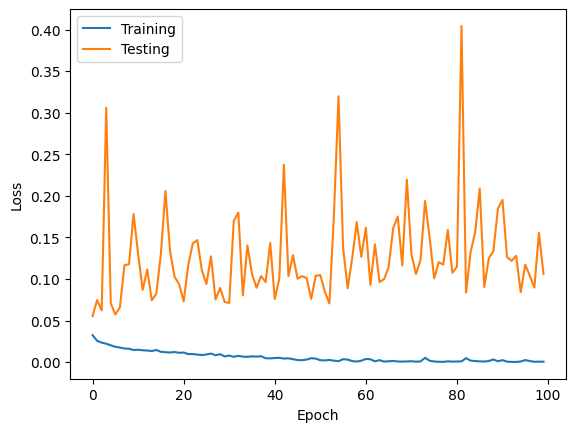

In [ ]:
epochs = list(range(num_epochs))

training_losses = [loss.item() for loss in training_losses]
testing_losses = [loss.item() for loss in testing_losses]

plt.plot(epochs, training_losses, label = "Training")
plt.plot(epochs, testing_losses, label = "Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
def accumulate_predictions(model, dataloader):
  predictions = []
  targets = []
  device = "cuda:0"
  model.eval()
  with tc.set_grad_enabled(False):
      print(f"Dataset size: {len(dataloader.dataset)}")
      for images, classes in dataloader:
        images, classes = images.to(device), classes.to(device) # TODO: Transfer the images and classes to GPU
        predictions += [tc.argmax(image) for image in model(images)]
        targets += classes
  return predictions, targets

training_predictions, training_targets = accumulate_predictions(model, training_dataloader)
testing_predictions, testing_targets =  accumulate_predictions(model, testing_dataloader)

Dataset size: 2854
Dataset size: 394


Confusion matrix training::  [[815   0   0   0]
 [596 212  10   4]
 [ 35   0 360   0]
 [554   0   0 268]]
              precision    recall  f1-score   support

      Glioma       0.41      1.00      0.58       815
  Meningioma       1.00      0.26      0.41       822
     Healthy       0.97      0.91      0.94       395
   Pituitary       0.99      0.33      0.49       822

    accuracy                           0.58      2854
   macro avg       0.84      0.62      0.61      2854
weighted avg       0.82      0.58      0.55      2854

Confusion matrix testing::  [[42 10 44  4]
 [16 85  8  6]
 [13  0 92  0]
 [33  3 12 26]]
              precision    recall  f1-score   support

      Glioma       0.40      0.42      0.41       100
  Meningioma       0.87      0.74      0.80       115
     Healthy       0.59      0.88      0.70       105
   Pituitary       0.72      0.35      0.47        74

    accuracy                           0.62       394
   macro avg       0.65      0.60      0.60 

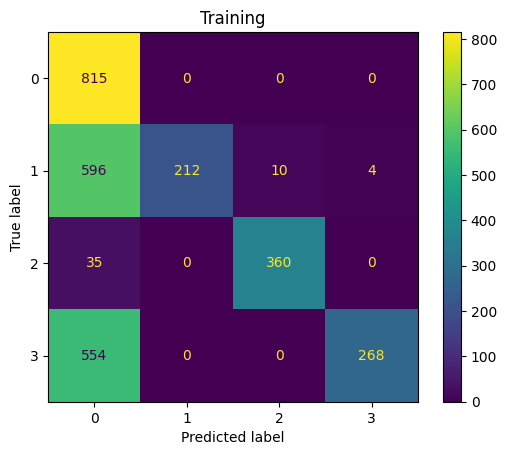

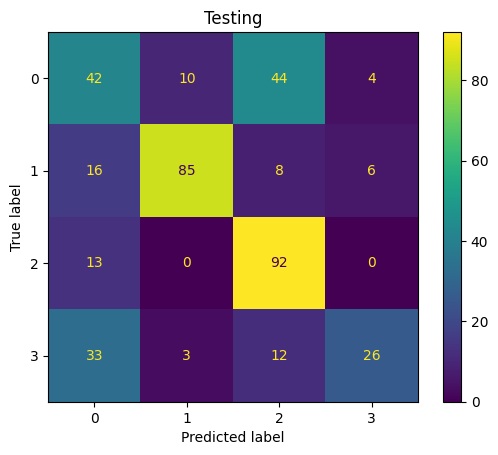

In [ ]:
import sklearn.metrics as metrics

target_names = ["Glioma", "Meningioma", "Healthy", "Pituitary"]
labels = [0,1,2,3]

training_predictions = [prediction.item() for prediction in training_predictions]
training_targets = [target.item() for target in training_targets]
testing_predictions = [prediction.item() for prediction in testing_predictions]
testing_targets = [target.item() for target in testing_targets]

cm_training = metrics.confusion_matrix(training_targets, training_predictions, labels=labels)
print("Confusion matrix training: ", cm_training)
print(metrics.classification_report(training_targets, training_predictions, target_names=target_names))

cm_testing = metrics.confusion_matrix(testing_targets, testing_predictions, labels=labels)
print("Confusion matrix testing: ", cm_testing)
print(metrics.classification_report(testing_targets, testing_predictions, target_names=target_names))

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_training, display_labels=labels)
disp.plot()
disp.ax_.set_title("Training")
plt.show()

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_testing, display_labels=labels)
disp.plot()
disp.ax_.set_title("Testing")
plt.show()

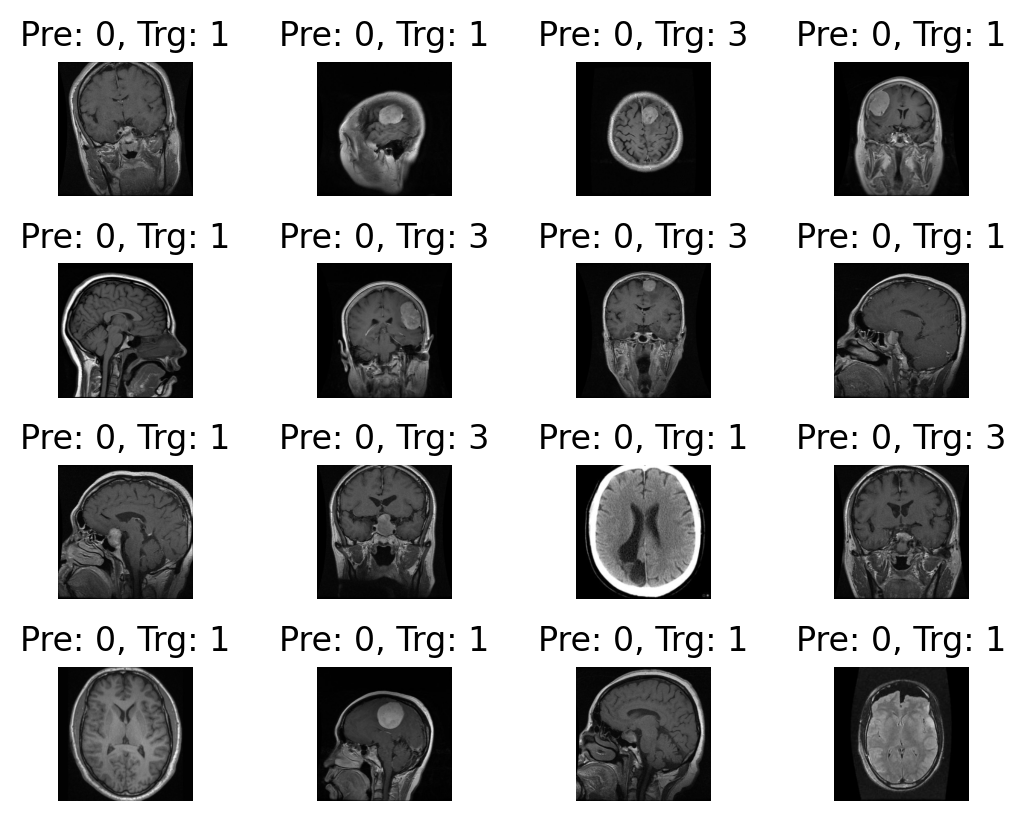

In [ ]:
plt.figure(dpi=200)
i = 1
index = 0

for images, classes in training_dataloader:
    plt.subplot(4, 4, i)

    if training_predictions[index] == training_targets[index]:
      index += 1
      continue # only show incorrectly classified cases

    plt.imshow(images[0, 0, :, :], cmap='gray')
    plt.subplots_adjust(hspace=0.5)
    plt.axis('off')
    plt.title('Pre: ' + str(training_predictions[index]) + ', Trg: ' + str(training_targets[index]))
    index += 1
    i += 1

    if i > 4*4:
      break